In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [138]:
df=pd.read_csv('kiva_loans.csv')

In [139]:
df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [140]:
df.shape

(671205, 20)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [142]:
df.isnull().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

In [143]:
df.dropna(inplace=True)

In [144]:
df.isnull().sum()

id                    0
funded_amount         0
loan_amount           0
activity              0
sector                0
use                   0
country_code          0
country               0
region                0
currency              0
partner_id            0
posted_time           0
disbursed_time        0
funded_time           0
term_in_months        0
lender_count          0
tags                  0
borrower_genders      0
repayment_interval    0
date                  0
dtype: int64

In [145]:
df.shape

(423081, 20)

In [146]:
#Here we are considering only the loan amount by country

In [147]:
#EDA


In [148]:
df=df[['loan_amount','sector','country','region','lender_count','borrower_genders']].reset_index(drop=True)

In [149]:
df.head()

,loan_amount,sector,country,region,lender_count,borrower_genders
0,150.0,Transportation,India,Maynaguri,6,female
1,200.0,Agriculture,India,Maynaguri,8,female
2,400.0,Services,Pakistan,Ellahabad,8,female
3,475.0,Manufacturing,Pakistan,Lahore,19,female
4,400.0,Retail,Pakistan,Faisalabad,16,female


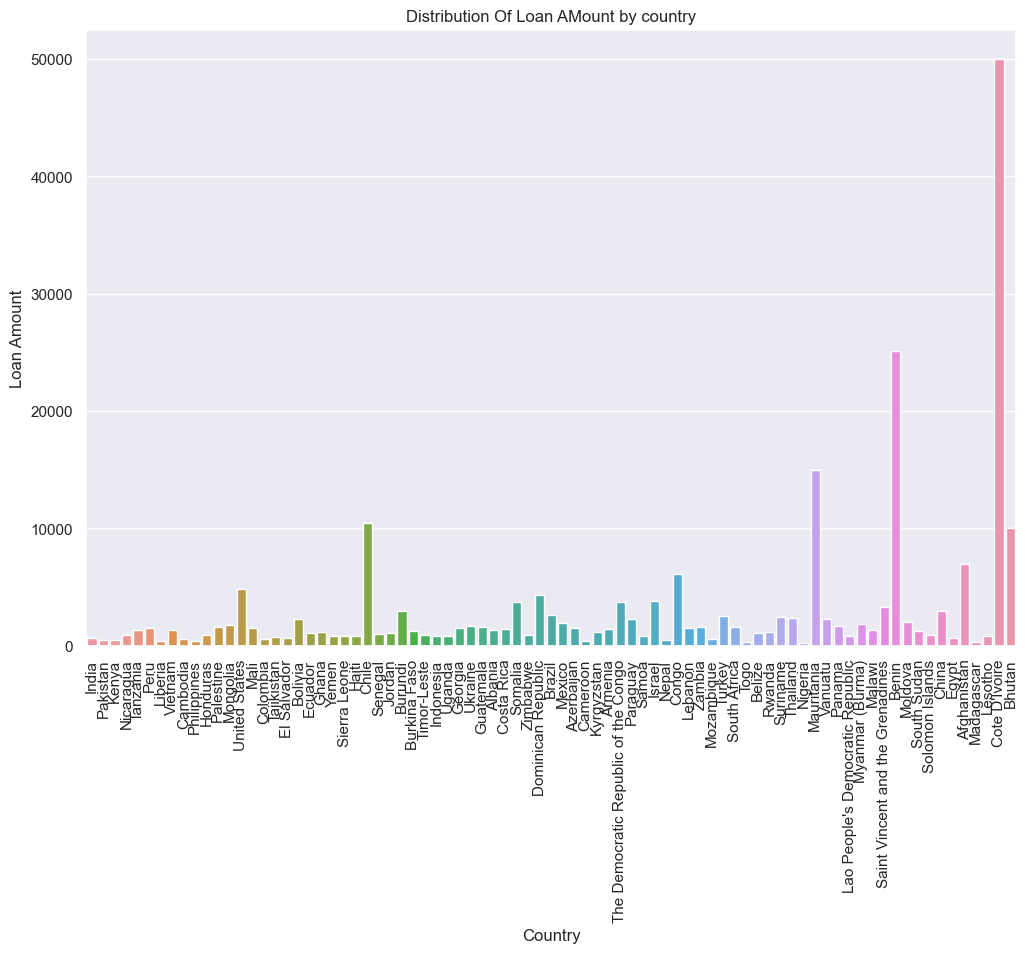

In [150]:
plt.figure(figsize=(12,8))
sns.barplot(x='country',y='loan_amount',data=df,ci=None)
plt.xlabel('Country')
plt.ylabel('Loan Amount')
plt.title('Distribution Of Loan AMount by country')
plt.xticks(rotation=90)
plt.show()

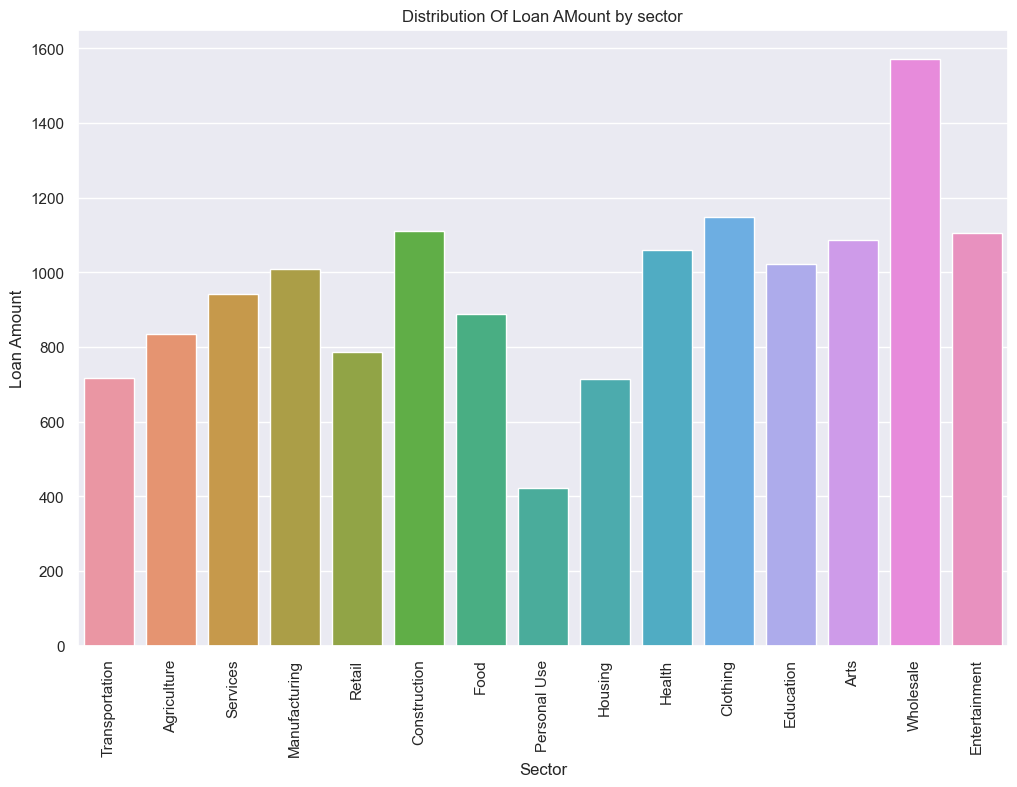

In [151]:
plt.figure(figsize=(12,8))
sns.barplot(x='sector',y='loan_amount',data=df,ci=None)
plt.xlabel('Sector')
plt.ylabel('Loan Amount')
plt.title('Distribution Of Loan AMount by sector')
plt.xticks(rotation=90)
plt.show()

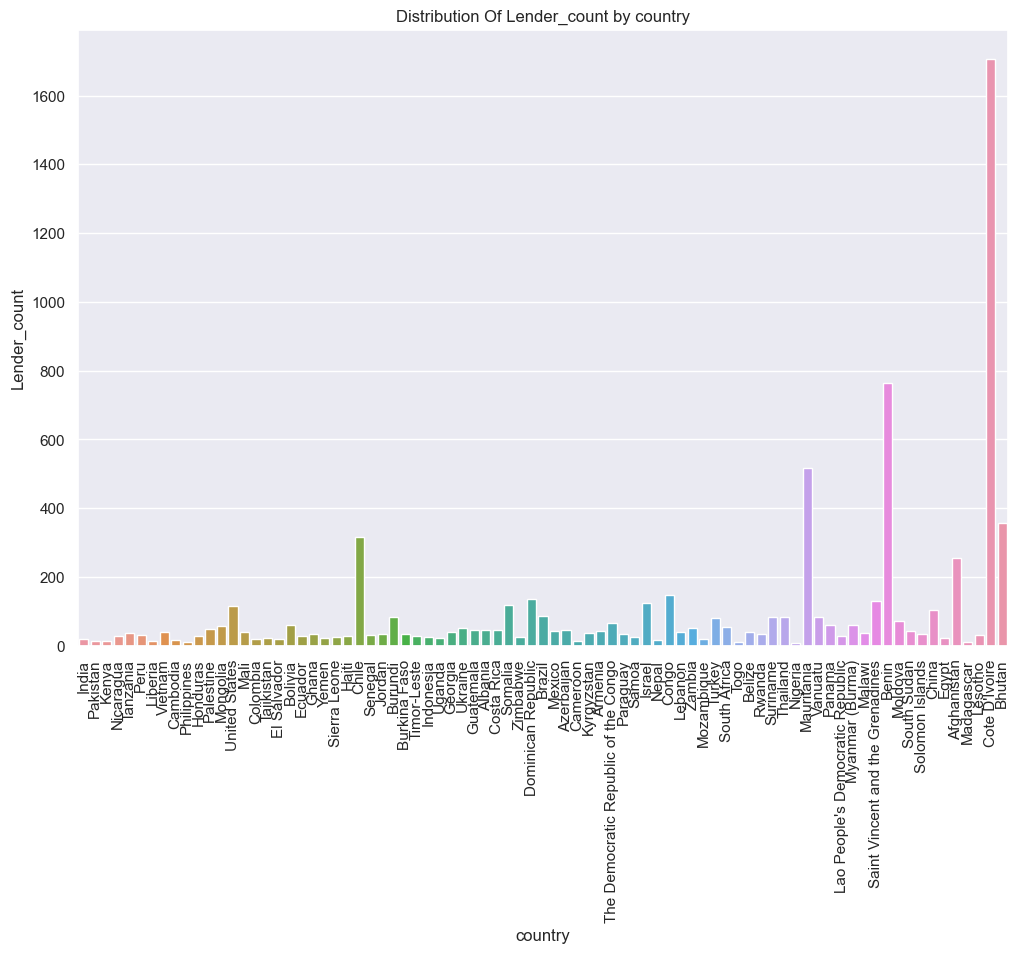

In [152]:
plt.figure(figsize=(12,8))
sns.barplot(x='country',y='lender_count',data=df,ci=None)
plt.xlabel('country')
plt.ylabel('Lender_count')
plt.title('Distribution Of Lender_count by country')
plt.xticks(rotation=90)
plt.show()

In [153]:
x=df[['loan_amount','country']]

In [154]:
x

,loan_amount,country
0,150.0,India
1,200.0,India
2,400.0,Pakistan
3,475.0,Pakistan
4,400.0,Pakistan
...,...,...
423076,350.0,Tajikistan
423077,2700.0,Paraguay
423078,475.0,Tajikistan
423079,3525.0,Paraguay


In [155]:
country_totals = df.groupby('country')['loan_amount'].sum().reset_index()

print(country_totals)

        country  loan_amount
0   Afghanistan      14000.0
1       Albania    1770800.0
2       Armenia    9252625.0
3    Azerbaijan    2108150.0
4        Belize      77725.0
..          ...          ...
76      Vanuatu       9250.0
77      Vietnam   11487275.0
78        Yemen    1265900.0
79       Zambia    1000725.0
80     Zimbabwe    2888575.0

[81 rows x 2 columns]


In [156]:
x=df[['loan_amount','country']]
print(x)

        loan_amount     country
0             150.0       India
1             200.0       India
2             400.0    Pakistan
3             475.0    Pakistan
4             400.0    Pakistan
...             ...         ...
423076        350.0  Tajikistan
423077       2700.0    Paraguay
423078        475.0  Tajikistan
423079       3525.0    Paraguay
423080        175.0  Tajikistan

[423081 rows x 2 columns]


In [157]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x['country_encoded'] = label_encoder.fit_transform(x['country'])

In [158]:
x=x.drop(columns='country',axis=0)
x.head()

,loan_amount,country_encoded
0,150.0,28
1,200.0,28
2,400.0,50
3,475.0,50
4,400.0,50


In [159]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(x)

In [160]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

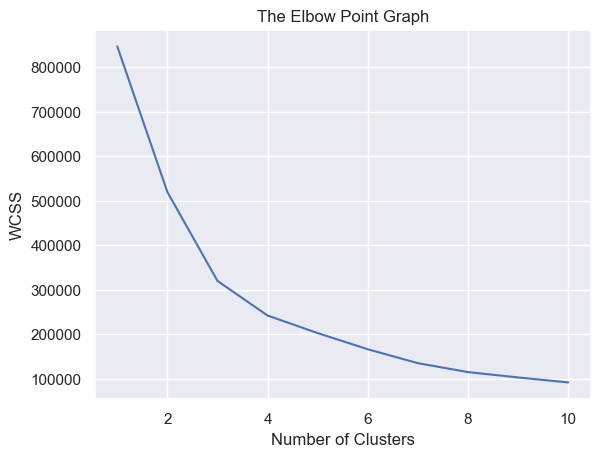

In [161]:
#plot an elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [162]:
#the optimum number of clusters is  

In [163]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans

KMeans(n_clusters=4, random_state=42)

In [164]:
x['Cluster'] = kmeans.fit_predict(scaled_features)
x['Cluster']

0         1
1         1
2         0
3         0
4         0
         ..
423076    0
423077    2
423078    0
423079    2
423080    0
Name: Cluster, Length: 423081, dtype: int32

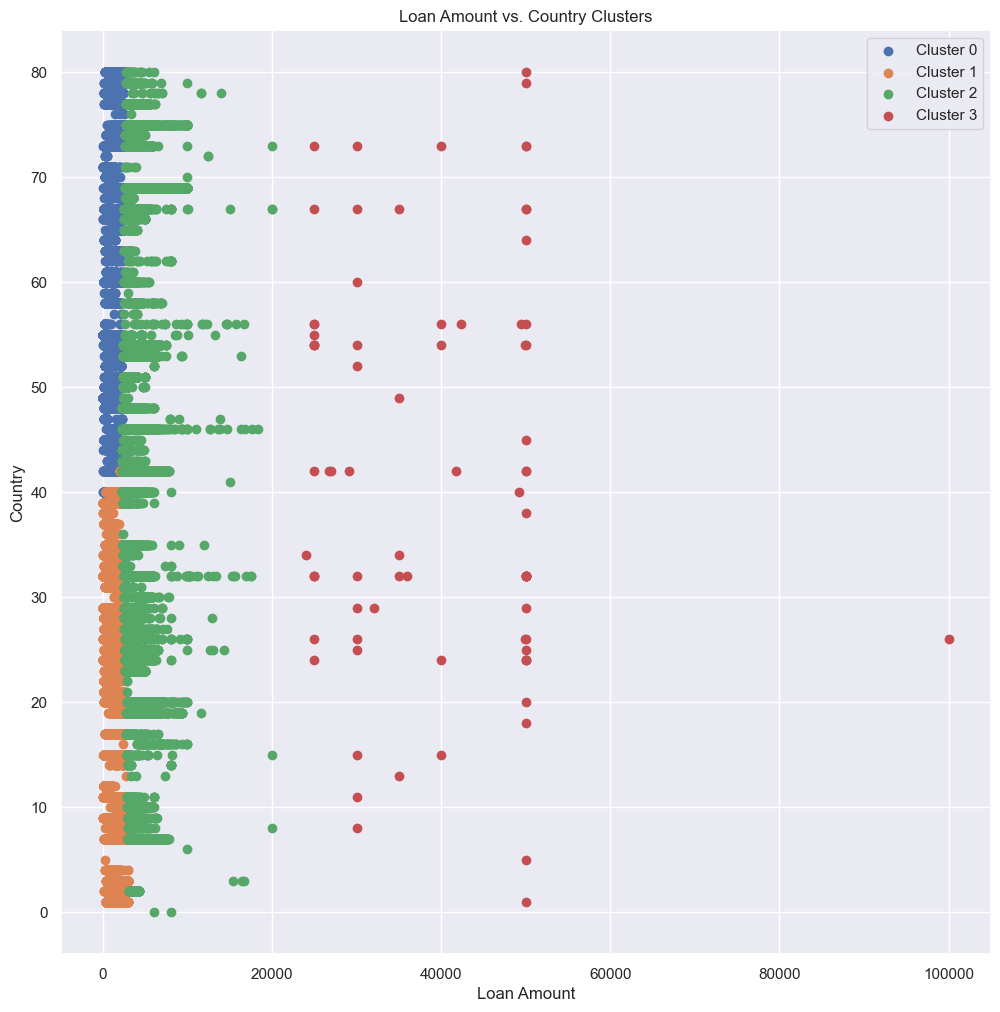

In [165]:
num_clusters=4
plt.figure(figsize=(12,12))
for cluster in range(num_clusters):
    cluster_data = x[x['Cluster'] == cluster]
    plt.scatter(cluster_data['loan_amount'], cluster_data['country_encoded'], label=f'Cluster {cluster}')
plt.xlabel('Loan Amount')
plt.ylabel('Country')
plt.legend()
plt.title('Loan Amount vs. Country Clusters')
plt.show()

In [166]:
for cluster in range(num_clusters):
    cluster_data = x[x['Cluster'] == cluster]
    print(f'Cluster {cluster}:')
    print(cluster_data[['loan_amount', 'country_encoded']])

Cluster 0:
        loan_amount  country_encoded
2             400.0               50
3             475.0               50
4             400.0               50
6             400.0               50
8             475.0               50
...             ...              ...
423061        300.0               53
423068        400.0               66
423076        350.0               66
423078        475.0               66
423080        175.0               66

[217988 rows x 2 columns]
Cluster 1:
        loan_amount  country_encoded
0             150.0               28
1             200.0               28
5             225.0               28
7             250.0               28
9             250.0               28
...             ...              ...
423070        100.0               22
423071        400.0               22
423072        300.0               22
423073       1300.0               20
423074        500.0               22

[181386 rows x 2 columns]
Cluster 2:
        loan_amount  coun